# Air Quality in Madrid (2001-2018)

In [1]:
#important library
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

In [2]:
# loading all csv file names
files = glob.glob("csvs_per_year/*.csv")

In [3]:
# reading csv files
for index,file in enumerate(files):
    files[index] = pd.read_csv(file,index_col='date',parse_dates=['date'])

In [4]:
# merging all csv files
df = pd.concat(files)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3808224 entries, 2001-08-01 01:00:00 to 2018-02-01 00:00:00
Data columns (total 18 columns):
 #   Column   Dtype  
---  ------   -----  
 0   BEN      float64
 1   CO       float64
 2   EBE      float64
 3   MXY      float64
 4   NMHC     float64
 5   NO_2     float64
 6   NOx      float64
 7   OXY      float64
 8   O_3      float64
 9   PM10     float64
 10  PXY      float64
 11  SO_2     float64
 12  TCH      float64
 13  TOL      float64
 14  station  int64  
 15  PM25     float64
 16  NO       float64
 17  CH4      float64
dtypes: float64(17), int64(1)
memory usage: 552.0 MB


In [6]:
df.head()

,BEN,CO,EBE,MXY,NMHC,NO_2,NOx,OXY,O_3,PM10,PXY,SO_2,TCH,TOL,station,PM25,NO,CH4
date,,,,,,,,,,,,,,,,,,
2001-08-01 01:00:00,NaN,0.37,NaN,NaN,NaN,58.400002,87.150002,NaN,34.529999,105.000000,NaN,6.34,NaN,NaN,28079001,NaN,NaN,NaN
2001-08-01 01:00:00,1.5,0.34,1.49,4.1,0.07,56.250000,75.169998,2.11,42.160000,100.599998,1.73,8.11,1.24,10.82,28079035,NaN,NaN,NaN
2001-08-01 01:00:00,NaN,0.28,NaN,NaN,NaN,50.660000,61.380001,NaN,46.310001,100.099998,NaN,7.85,NaN,NaN,28079003,NaN,NaN,NaN
2001-08-01 01:00:00,NaN,0.47,NaN,NaN,NaN,69.790001,73.449997,NaN,40.650002,69.779999,NaN,6.46,NaN,NaN,28079004,NaN,NaN,NaN
2001-08-01 01:00:00,NaN,0.39,NaN,NaN,NaN,22.830000,24.799999,NaN,66.309998,75.180000,NaN,8.80,NaN,NaN,28079039,NaN,NaN,NaN


### Handling NaN Values
Based off the `Handling_missing_values.ipynb` notebook. The following strategy will be used to handle our missing data;
1. Features with more than 50% missing data will be dropped. This is because the amount of known data points in these fearures is negligible compared to the amount of missing data. Imputing these values will lead to a huge bias in the data.

#### Method 1
<ol>
<li> Missing values in other features will be replaced with their median values. This is to preserve the statistical property of each feature as much as possible. Median is used here instead of the mean because the mean can be affected by the presence of outliers </li>
</ol>


#### Method 2
<ol>
<li> Missing values in other features will be replaced with respect to station with their median values. This is to preserve the statistical property of each feature as much as possible. Median is used here instead of the mean because the mean can be affected by the presence of outliers </li>
    <li> Left-over Missing values will be replaced with respect to month  with their mean values.</li></ol>

In [7]:
#cunt of data is null
df.isnull().sum().sort_values()

station          0
NO_2         21174
O_3         816492
PM10        946969
SO_2       1032264
CO         1157212
NOx        1431949
NO         2275827
TCH        2721783
NMHC       2722912
BEN        2766540
TOL        2769295
EBE        2806500
PM25       2991800
OXY        3492529
PXY        3492640
MXY        3492809
CH4        3793374
dtype: int64

In [8]:
#percentage of data is null
null_precentage = round((df.isnull().sum() * 100) / 3808224 , 2).sort_values()
null_precentage

station     0.00
NO_2        0.56
O_3        21.44
PM10       24.87
SO_2       27.11
CO         30.39
NOx        37.60
NO         59.76
TCH        71.47
NMHC       71.50
BEN        72.65
TOL        72.72
EBE        73.70
PM25       78.56
OXY        91.71
PXY        91.71
MXY        91.72
CH4        99.61
dtype: float64

### Removing unnecessary features

<li> Features with more than 50% missing data will be dropped. This is because the amount of known data points in these fearures is negligible compared to the amount of missing data. Imputing these values will lead to a huge bias in the data.</li>

In [9]:
#dataset with less then 50% null count
imp_index = null_precentage[null_precentage < 50].index.to_list()
clean_df = df[imp_index]
pd.options.mode.chained_assignment = None  # default='warn'

### Cleaning method 1

#### Inference
<p> We can see that simply replacing the missing values with the nearest datapoints does not completely solve our missing data problem. In addition dropping the rows with missing data causes a total loss of the entire data. we cannot simply replace missing values with random figures like 0 or 1 in other to avoid too great an influence on our data or setting up a kind of data bias.</p>
<p> The following strategy shall be used to handle our missing data;</p>
<ol>
    <li> Missing values in other features will be replaced with their median values. This is to preserve the statistical property of each feature as much as possible. Median is used here instead of the mean because the mean can be affected by the presence of outliers </li>
</ol>

In [10]:
# # replacing nan with median values
# clean_df = clean_df.transform(lambda x: x.fillna(x.median()))

### Cleaning method 2

<p> The following strategy shall be used to handle our missing data (Method 2);</p>
<ol>
    <li> Missing values in other features will be replaced with respect to station with their median values. This is to preserve the statistical property of each feature as much as possible. Median is used here instead of the mean because the mean can be affected by the presence of outliers </li>
    <li> Left-over Missing values will be replaced with respect to month  with their mean values.</li>
</ol>

In [11]:
# replacing nan values with respect to city
clean_df.iloc[:,1:-1] = clean_df.groupby('station').transform(lambda x:x.fillna(x.median()))
clean_df['month'] = clean_df.index.month

# replacing leftover nan values with respect to month
clean_df.iloc[:,0:-2] = clean_df.groupby('month').transform(lambda x:x.fillna(x.mean()))
clean_df = clean_df.drop('month',axis=1)

In [12]:
clean_df.head()

,station,NO_2,O_3,PM10,SO_2,CO,NOx
date,,,,,,,
2001-08-01 01:00:00,28079001,58.400002,34.529999,105.000000,6.34,0.37,87.150002
2001-08-01 01:00:00,28079035,56.250000,42.160000,100.599998,8.11,0.34,75.169998
2001-08-01 01:00:00,28079003,50.660000,46.310001,100.099998,7.85,0.28,61.380001
2001-08-01 01:00:00,28079004,69.790001,40.650002,69.779999,6.46,0.47,73.449997
2001-08-01 01:00:00,28079039,22.830000,66.309998,75.180000,8.80,0.39,24.799999


## Exploring the Cleaned DataFrame

In [13]:
clean_df.describe()

,station,NO_2,O_3,PM10,SO_2,CO,NOx
count,3.808224e+06,3.808224e+06,3.808224e+06,3.808224e+06,3.808224e+06,3.808224e+06,2.376275e+06
mean,2.807903e+07,5.044630e+01,3.933992e+01,2.769681e+01,1.044172e+01,5.391844e-01,1.093188e+02
std,2.028574e+01,3.447945e+01,2.734671e+01,2.271452e+01,7.938597e+00,4.524700e-01,1.102871e+02
min,2.807900e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.807901e+07,2.400000e+01,1.799000e+01,1.371000e+01,6.740000e+00,3.000000e-01,4.000000e+01
50%,2.807902e+07,4.400000e+01,3.617000e+01,2.300000e+01,8.381480e+00,4.300000e-01,7.615000e+01
75%,2.807904e+07,6.943000e+01,5.479795e+01,3.166000e+01,1.215000e+01,6.500000e-01,1.397000e+02
max,2.807910e+07,6.286000e+02,2.360000e+02,6.950000e+02,1.991000e+02,1.804000e+01,2.537000e+03


In [14]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3808224 entries, 2001-08-01 01:00:00 to 2018-02-01 00:00:00
Data columns (total 7 columns):
 #   Column   Dtype  
---  ------   -----  
 0   station  int64  
 1   NO_2     float64
 2   O_3      float64
 3   PM10     float64
 4   SO_2     float64
 5   CO       float64
 6   NOx      float64
dtypes: float64(6), int64(1)
memory usage: 232.4 MB


The dataset is made up of 3,808,224 indexes and 10 columns

In [15]:
clean_df.tail()

,station,NO_2,O_3,PM10,SO_2,CO,NOx
date,,,,,,,
2018-02-01,28079056,91.0,1.000000,35.000000,14.368886,0.500000,192.0
2018-02-01,28079057,107.0,29.274251,29.000000,15.000000,0.700000,241.0
2018-02-01,28079058,48.0,2.000000,26.207561,14.368886,0.664873,91.0
2018-02-01,28079059,103.0,2.000000,26.207561,14.368886,0.664873,320.0
2018-02-01,28079060,96.0,3.000000,26.000000,14.368886,0.664873,202.0


### AQI Calculation
https://app.cpcbccr.com/ccr_docs/How_AQI_Calculated.pdf
https://www.kaggle.com/rohanrao/calculating-aqi-air-quality-index-tutorial/notebook

In [16]:
clean_df["PM10_24hr_avg"] = clean_df.groupby("station")["PM10"].rolling(window = 24, min_periods = 1).mean().values
clean_df["SO2_24hr_avg"] = clean_df.groupby("station")["SO_2"].rolling(window = 24, min_periods = 1).mean().values
clean_df["NOx_24hr_avg"] = clean_df.groupby("station")["NOx"].rolling(window = 24, min_periods = 1).mean().values
clean_df["CO_8hr_max"] = clean_df.groupby("station")["CO"].rolling(window = 8, min_periods = 1).max().values
clean_df["O3_8hr_max"] = clean_df.groupby("station")["O_3"].rolling(window = 8, min_periods = 1).max().values

In [17]:
## PM10 Sub-Index calculation
def get_PM10_subindex(x):
    if x <= 50:
        return x
    elif x <= 100:
        return x
    elif x <= 250:
        return 100 + (x - 100) * 100 / 150
    elif x <= 350:
        return 200 + (x - 250)
    elif x <= 430:
        return 300 + (x - 350) * 100 / 80
    elif x > 430:
        return 400 + (x - 430) * 100 / 80
    else:
        return 0

clean_df["PM10_SubIndex"] = clean_df["PM10_24hr_avg"].apply(lambda x: get_PM10_subindex(x))

In [18]:
## SO2 Sub-Index calculation
def get_SO2_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x <= 380:
        return 100 + (x - 80) * 100 / 300
    elif x <= 800:
        return 200 + (x - 380) * 100 / 420
    elif x <= 1600:
        return 300 + (x - 800) * 100 / 800
    elif x > 1600:
        return 400 + (x - 1600) * 100 / 800
    else:
        return 0

clean_df["SO2_SubIndex"] = clean_df["SO2_24hr_avg"].apply(lambda x: get_SO2_subindex(x))

In [19]:
## NOx Sub-Index calculation
def get_NOx_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x <= 180:
        return 100 + (x - 80) * 100 / 100
    elif x <= 280:
        return 200 + (x - 180) * 100 / 100
    elif x <= 400:
        return 300 + (x - 280) * 100 / 120
    elif x > 400:
        return 400 + (x - 400) * 100 / 120
    else:
        return 0

clean_df["NOx_SubIndex"] = clean_df["NOx_24hr_avg"].apply(lambda x: get_NOx_subindex(x))

In [20]:
## CO Sub-Index calculation
def get_CO_subindex(x):
    if x <= 1:
        return x * 50 / 1
    elif x <= 2:
        return 50 + (x - 1) * 50 / 1
    elif x <= 10:
        return 100 + (x - 2) * 100 / 8
    elif x <= 17:
        return 200 + (x - 10) * 100 / 7
    elif x <= 34:
        return 300 + (x - 17) * 100 / 17
    elif x > 34:
        return 400 + (x - 34) * 100 / 17
    else:
        return 0

clean_df["CO_SubIndex"] = clean_df["CO_8hr_max"].apply(lambda x: get_CO_subindex(x))

In [21]:
## O3 Sub-Index calculation
def get_O3_subindex(x):
    if x <= 50:
        return x * 50 / 50
    elif x <= 100:
        return 50 + (x - 50) * 50 / 50
    elif x <= 168:
        return 100 + (x - 100) * 100 / 68
    elif x <= 208:
        return 200 + (x - 168) * 100 / 40
    elif x <= 748:
        return 300 + (x - 208) * 100 / 539
    elif x > 748:
        return 400 + (x - 400) * 100 / 539
    else:
        return 0

clean_df["O3_SubIndex"] = clean_df["O3_8hr_max"].apply(lambda x: get_O3_subindex(x))

In [22]:
clean_df.head()

,station,NO_2,O_3,PM10,SO_2,CO,NOx,PM10_24hr_avg,SO2_24hr_avg,NOx_24hr_avg,CO_8hr_max,O3_8hr_max,PM10_SubIndex,SO2_SubIndex,NOx_SubIndex,CO_SubIndex,O3_SubIndex
date,,,,,,,,,,,,,,,,,
2001-08-01 01:00:00,28079001,58.400002,34.529999,105.000000,6.34,0.37,87.150002,105.000,6.340000,87.150002,0.37,34.529999,103.333333,7.925000,107.150002,18.500000,34.529999
2001-08-01 01:00:00,28079035,56.250000,42.160000,100.599998,8.11,0.34,75.169998,87.375,6.745000,90.490002,0.42,34.529999,87.375000,8.431250,110.490002,20.999999,34.529999
2001-08-01 01:00:00,28079003,50.660000,46.310001,100.099998,7.85,0.28,61.380001,76.990,6.583333,89.690000,0.42,34.529999,76.990000,8.229167,109.690000,20.999999,34.529999
2001-08-01 01:00:00,28079004,69.790001,40.650002,69.779999,6.46,0.47,73.449997,70.415,6.235000,83.000000,0.42,42.209999,70.415000,7.793750,103.000000,20.999999,42.209999
2001-08-01 01:00:00,28079039,22.830000,66.309998,75.180000,8.80,0.39,24.799999,66.230,5.994000,78.926000,0.42,48.459999,66.230000,7.492500,98.657500,20.999999,48.459999


In [23]:
clean_df["AQI_calculated"] = round(clean_df[["PM10_SubIndex","NOx_SubIndex", "CO_SubIndex", "O3_SubIndex"]].max(axis = 1))

## AQI visualization

<AxesSubplot:xlabel='date', ylabel='AQI_calculated'>

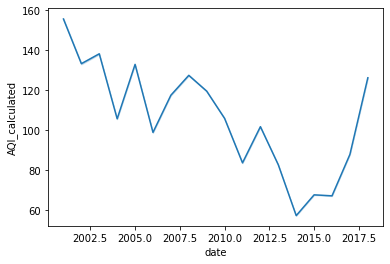

In [24]:
sns.lineplot(x=clean_df.index.year,y=clean_df["AQI_calculated"])